# Create and fit a new model

## Define model

Let's create a new model. First we import solver interface:

In [1]:
import numpy as np
from scifit.interfaces.generic import FitSolverInterface

Pretend we want to fit someting like:

$$y = a \cdot x + \sqrt{b \cdot x^2 + \pi} + c \cdot \exp (-d \cdot x) + e$$

Probably not the best problem formulation but insighful for an example. In goes as follows:

In [2]:
class MyModel(FitSolverInterface):
    @staticmethod
    def model(x, a, b, c, d, e):
        return a*x[:, 0] + np.sqrt(b*np.power(x[:, 0], 2) + np.pi) + c * np.exp(-d * x[:, 0]) + e

Instantiate the new solver:

In [3]:
solver = MyModel()

## Load data

Now we generate some synthetic dataset for a given problem:

In [4]:
X = solver.feature_dataset(xmin=-2.5, xmax=15.0, dimension=1, resolution=100)

In [5]:
X.shape

(100, 1)

In [6]:
p = [1.38, 2.21, 14.71, 0.81, -4.67]

In [7]:
t = solver.target_dataset(X, *p, sigma=0.075, scale_mode="auto", seed=1234, full_output=True)

In [8]:
y = t["ydata"]
s = t["sigmas"]

In [9]:
y.shape

(100,)

In [10]:
s.shape

(100,)

## Solve Fit

Everything is setup, we can solve our problem:

In [11]:
solution = solver.fit(X, y, sigma=s)

In [12]:
solver.solved()

True

In [13]:
print(solution["message"])

Both actual and predicted relative reductions in the sum of squares
  are at most 0.000000


In [14]:
print(solution["parameters"])

[ 0.83233518  3.84079499 13.64238313  0.82951643 -3.79318095]


In [15]:
print(np.diag(solution["covariance"]))

[4.41874513e+00 6.35576173e+01 5.06914519e+00 1.82189414e-03
 1.93288990e+00]


As we can see, parameters suffer high variances probably due to problem formulation and noise intensity.

## Render solution

Finally we can render fit and loss function to check the dynamic:

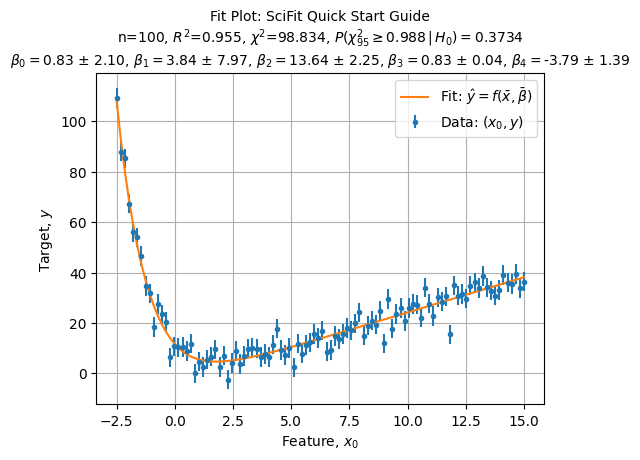

In [16]:
axe = solver.plot_fit(title="SciFit Quick Start Guide")

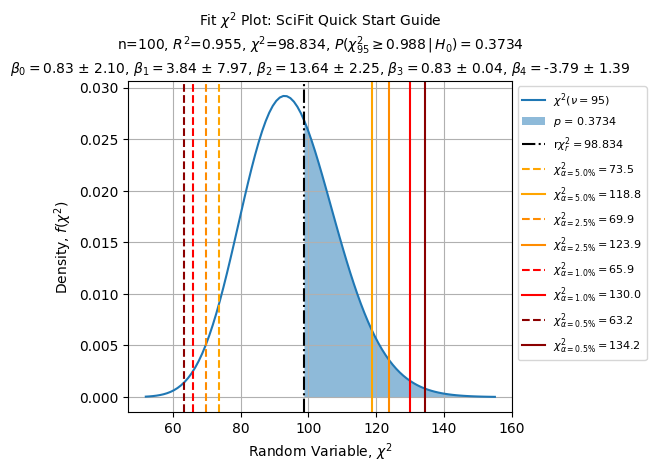

In [17]:
axe = solver.plot_chi_square(title="SciFit Quick Start Guide")

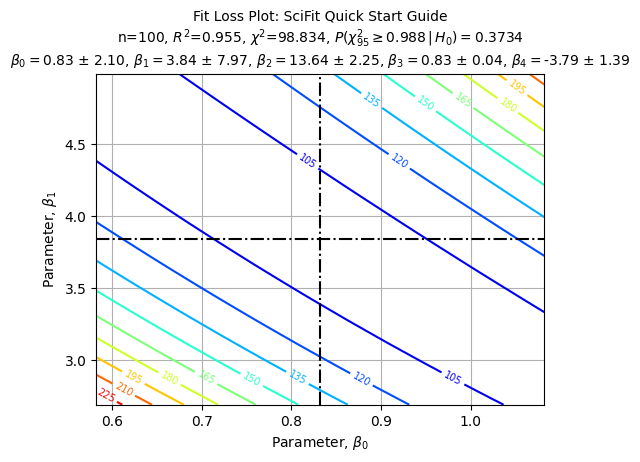

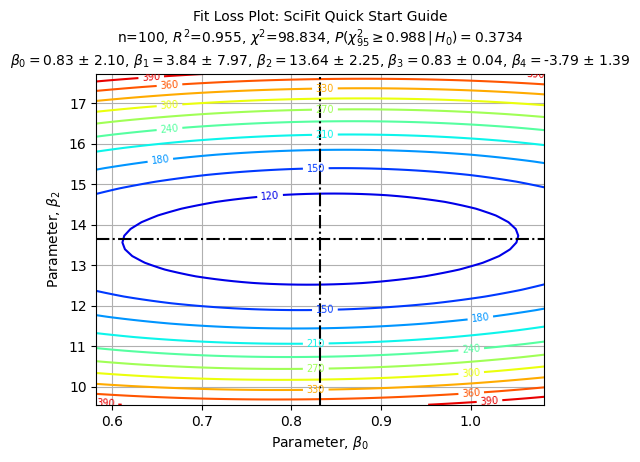

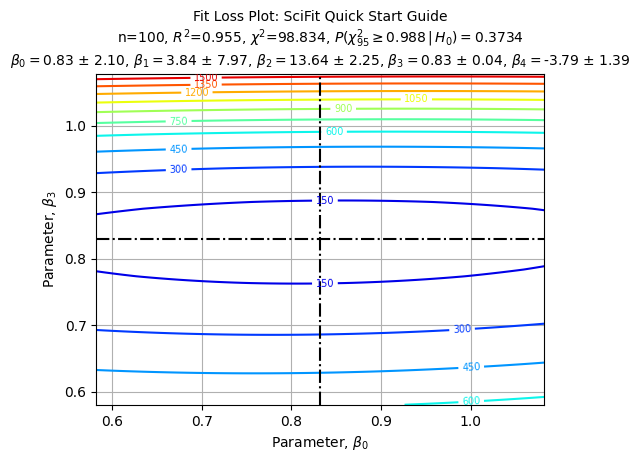

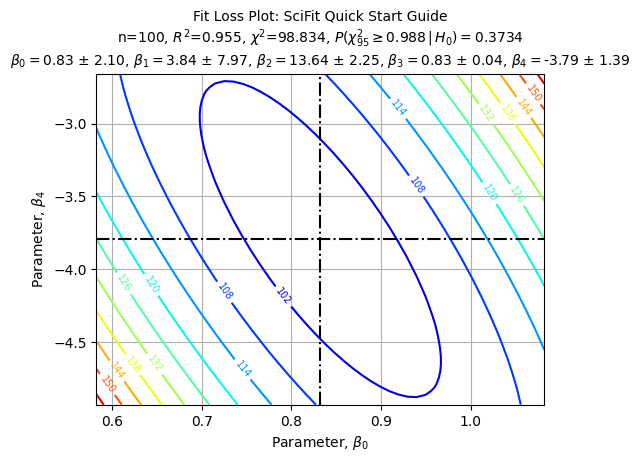

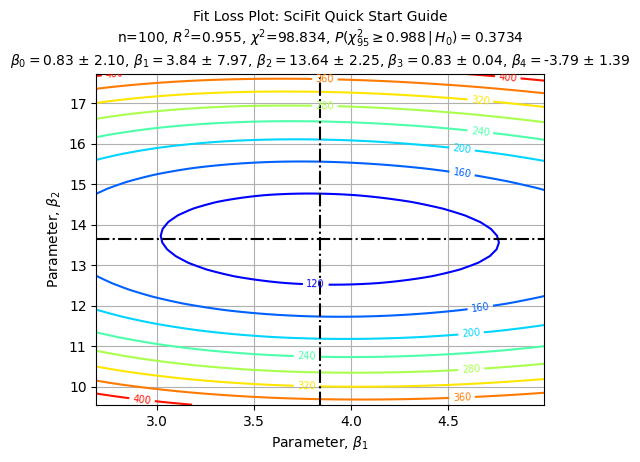

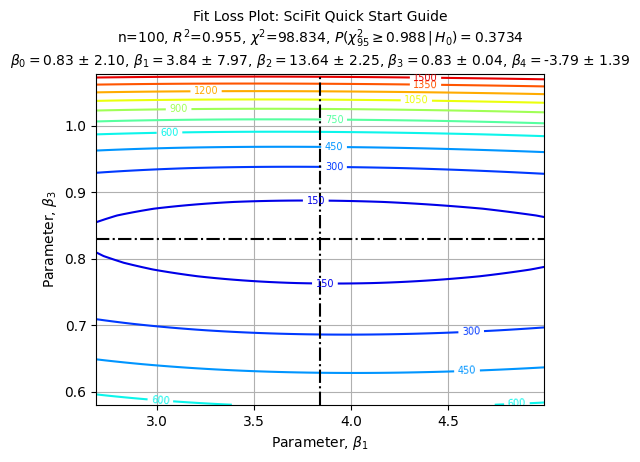

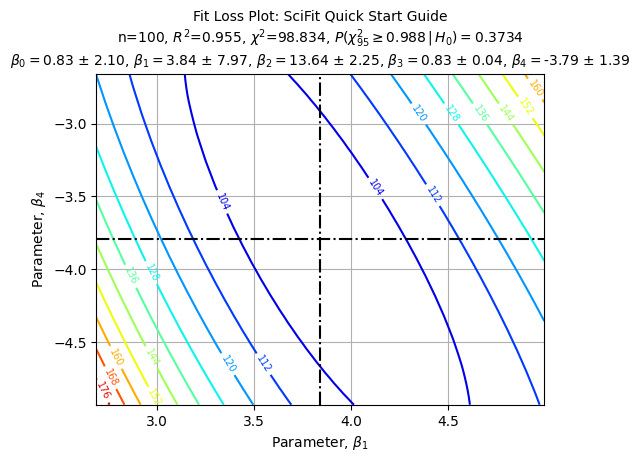

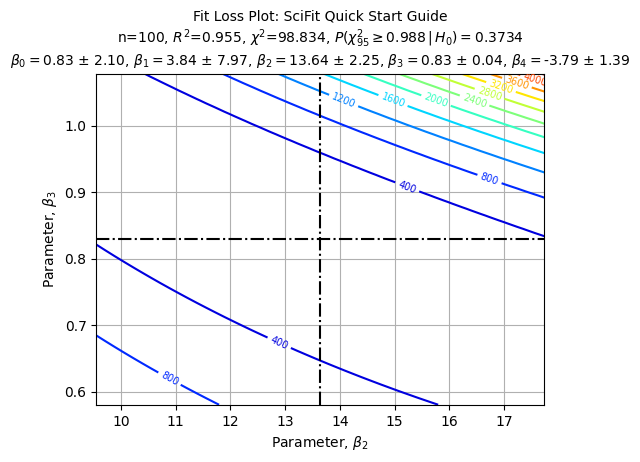

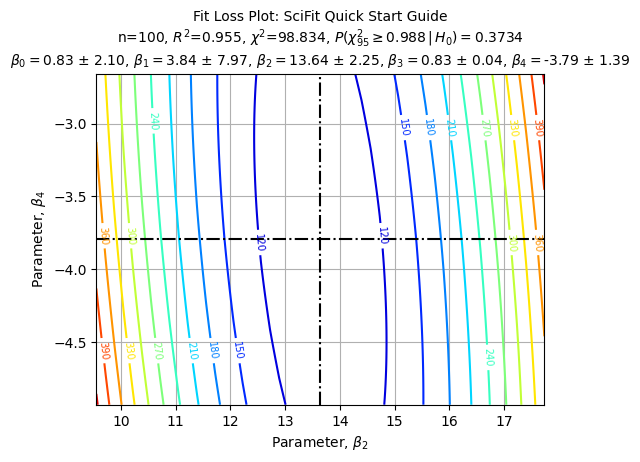

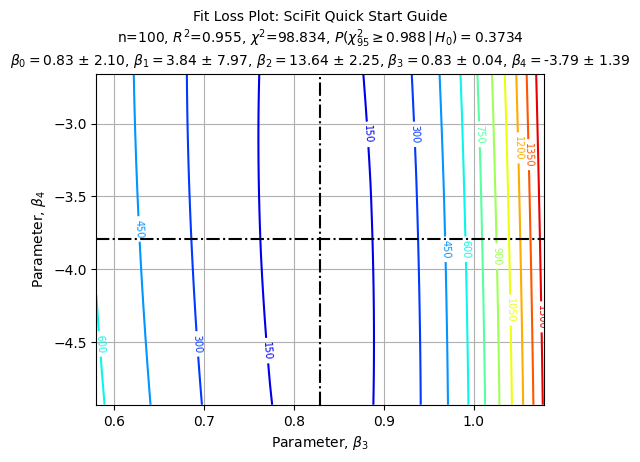

In [18]:
for axe in solver.plot_loss(title="SciFit Quick Start Guide"):
    axe